In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

# loading digits dataset
digits = load_digits()
X = digits.data # shape: (n_samples, 64) --> 64 features per sample
X /= 16.0 # normalizing pixel values to [0, 1]

# 80/20 split train/validation
X_train, X_val = train_test_split(X, test_size=.2, random_state=42)

# making sure sets are the right shapes 
print(f"training set shape: {X_train.shape}")
print(f"validation set shape: {X_val.shape}")

training set shape: (1437, 64)
validation set shape: (360, 64)


In [9]:
import importlib
import nn
from nn import NeuralNetwork
import matplotlib.pyplot as plt

# defining architecture for autoencoder
autoencoder_arch = [
    {"input_dim": 64, "output_dim": 16, "activation": "relu"},   # input - hidden (compression)
    {"input_dim": 16, "output_dim": 64, "activation": "sigmoid"} # hidden - output (reconstruction)
]

# initializing autoencoder model
autoencoder = NeuralNetwork(
    nn_arch=autoencoder_arch, 
    lr=0.05, 
    seed=42,        
    batch_size=32,   
    epochs=2225, 
    loss_function="mean_squared_error"
)

print("autoencoder initialized")

#training
print("calling fit()")
train_loss, val_loss = autoencoder.fit(X_train.T, X_train.T, X_val.T, X_val.T)
print("fit() done")

print("done")

autoencoder initialized
calling fit()
fit() done
done


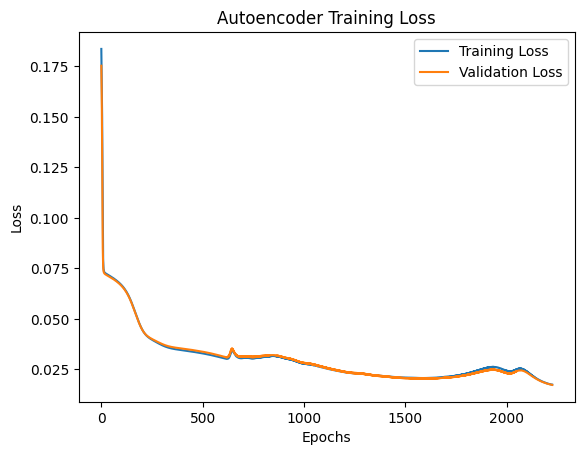

In [5]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label="training loss")
plt.plot(val_loss, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("autoencoder training loss")
plt.legend()
plt.show()


In [10]:
# get predictions from the autoencoder
X_val_pred = autoencoder.predict(X_val.T)

# compute MSE as reconstruction error
reconstruction_error = np.mean((X_val.T - X_val_pred) ** 2)

print(f"reconstruction error (MSE): {reconstruction_error:.4f}")


reconstruction error (MSE): 0.0551


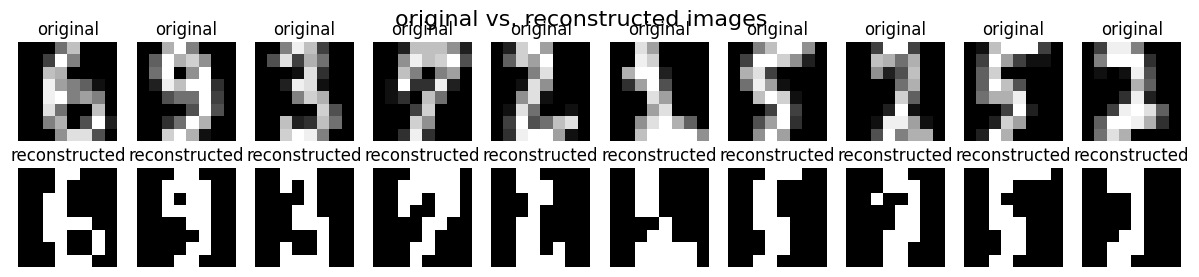

In [11]:
import matplotlib.pyplot as plt
import numpy as np

""" visualizing the digits reconstruction to also visually validate"""


# select a few samples from the validation set
num_samples = 10  
X_samples = X_val[:num_samples].T  # select first few and transpose

# get reconstructed images
X_reconstructed = autoencoder.predict(X_samples)

# reshape for visualization (each sample is 8x8)
X_samples = X_samples.T.reshape(-1, 8, 8)  # original images
X_reconstructed = X_reconstructed.T.reshape(-1, 8, 8)  # reconstructed images

# plot original vs reconstructed images
fig, axes = plt.subplots(2, num_samples, figsize=(num_samples * 1.5, 3))

for i in range(num_samples):
    # original image
    axes[0, i].imshow(X_samples[i], cmap="gray")
    axes[0, i].axis("off")
    axes[0, i].set_title("original")

    # reconstructed image
    axes[1, i].imshow(X_reconstructed[i], cmap="gray")
    axes[1, i].axis("off")
    axes[1, i].set_title("reconstructed")

plt.suptitle("original vs. reconstructed images", fontsize=16)
plt.show()


In [ ]:
"""

explanation of hyperparameters 

i originally started with lr = .01 and epochs = 50, but that got me an MSE of .1631

so i increased the number of epochs to 100 (lr = .01) and got a lower MSE of .1578 

then i decreased the lr to .005 (epochs = 100 still) and the MSE shot back up to .1632 

so following the trend of lr = .01 and higher epochs, i eventually got to epochs = 2225 to get an MSE of .0551

"""